In [1]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'last' / 'last'

In [2]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])



,month,count,mean
0,5,57,1.543860
1,2,21,1.476190
2,3,39,1.461538
3,10,71,1.422535
4,6,71,1.408451
5,8,129,1.403101
6,1,38,1.394737
7,12,149,1.382550
8,7,75,1.373333
9,11,54,1.351852


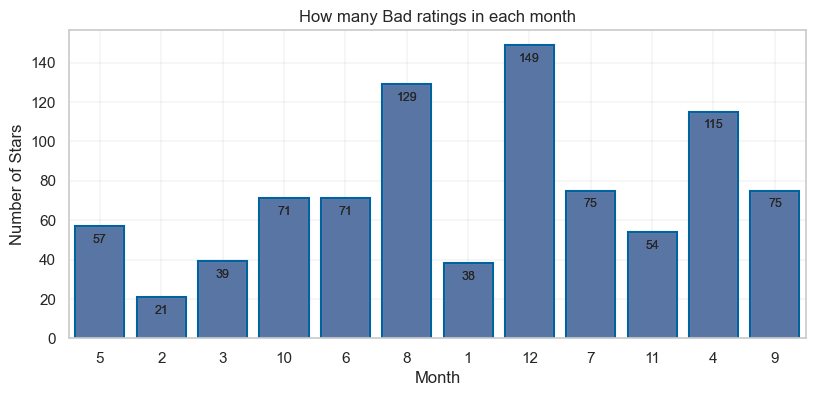

In [32]:
#Let's filter the dataset by ratings <=2
rb[rb['rating_score']<=2].shape

#DATA
#group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year,rb['pickup_date'].dt.month])
group = rb[rb['rating_score']<=2].groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1.columns=['month', 'count', 'mean']
g1

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='month',y='count',  fill=True, order=g1['month'])

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='month',y='count',  fill=False, order=g1['month'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)

#ax.set_xticks(g1['pickup_date']-1, labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])#<-- This is improveable :( but for some reason it is not working intuitively.
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('How many Bad ratings in each month')

ax.set(xlabel='Month', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


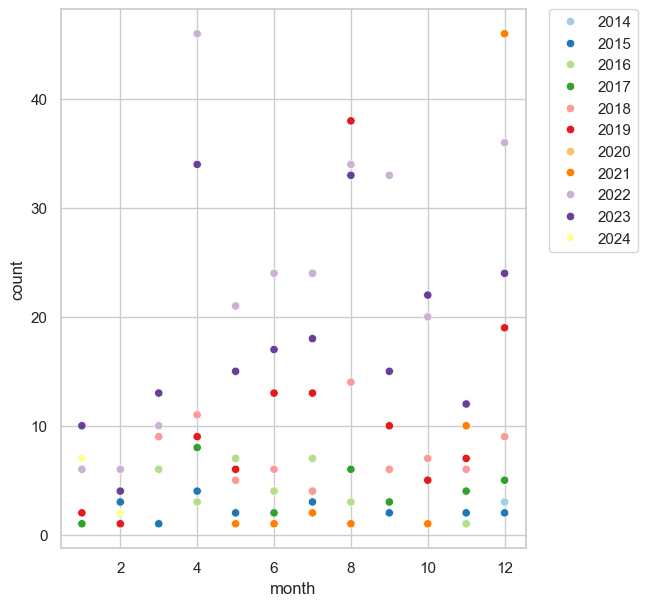

In [46]:
#We are showing that months with more work have more complaints... but we are not showing the proportion.
#We are going to make a line and a hue for year

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count', 'mean']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 6
height = 7
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
sns.scatterplot(data=g1, x='month',y='count',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#We are showing that months with more work have more complaints... but we are not showing the proportion.
#We are going to make a line and a hue for year

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count', 'mean']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 6
height = 7
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
sns.scatterplot(data=g1, x='month',y='count',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)